**Цель лабораторной работы:** изучение ансамблей моделей машинного обучения

**Задание**
    
    1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
    2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
    3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
    4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.


Для лабораторной работы будем использовать набор данных о Мировом рейтинге университетов.

Колонки:

 - `world_rank` - мировой рейтинг
 - `institution` - название института
 - `country` - страна
 - `national_rank` - ранг университета по его стране
 - `quality_of_education` - качество обучения
 - `alumni_employment` - ранг трудоустройства учеников
 - `quality_of_faculty` - ранг качества факультета
 - `publications` - публикации
 - `influence` - влияние
 - `citations` - цитирование
 - `broad_impact` - ранк всемирного влияния
 - `patents` - патенты
 - `score` - очки
 - `year` - год

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
# Таблица данных
data = pd.read_csv('cwurData.csv')
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


<AxesSubplot:>

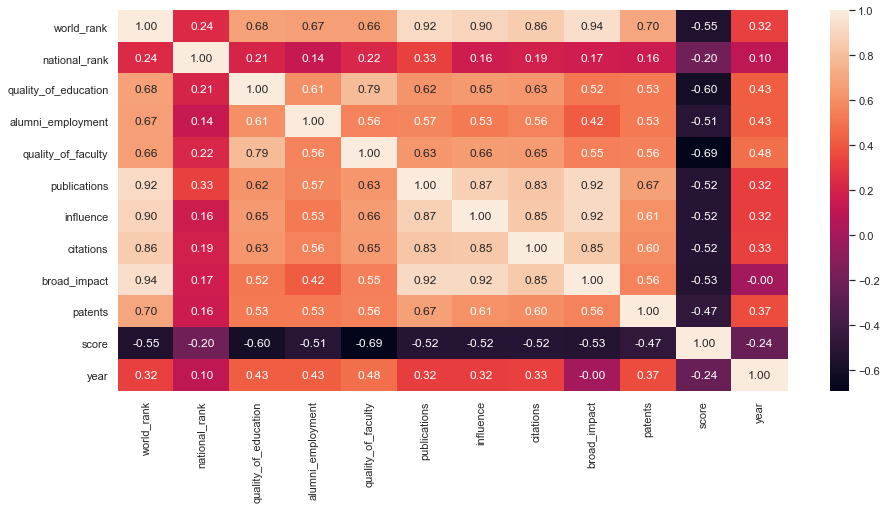

In [3]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [4]:
# Размер набора данных
data.shape

(2200, 14)

In [5]:
# Типы данных в колонках
data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

## Подготовка к анализу данных

### Проверка на пропущенные значения

In [6]:
data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [7]:
data['broad_impact'] = data['broad_impact'].fillna(data['broad_impact'].mean())

In [8]:
data.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

### Основные статистические показатели для каждого параметра

In [9]:
data.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,273.561032,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,273.000000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.699500,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,716.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


### Преообразование категориальных признаков в числовые

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
    # "institution" - институт
le.fit(data.institution.drop_duplicates()) 
data.institution = le.transform(data.institution)
    # "country" - страна
le.fit(data.country.drop_duplicates()) 
data.country = le.transform(data.country)

In [12]:
data. head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,184,54,1,7,9,1,1,1,1,496.6995,5,100.00,2012
1,2,312,54,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,3,511,54,3,17,11,5,4,2,2,496.6995,15,89.50,2012
3,4,637,57,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,5,53,54,4,2,29,7,37,22,22,496.6995,18,85.21,2012


In [13]:
data.describe()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,516.390909,34.110455,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,294.908607,19.211020,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,273.561032,273.996525,7.760806,0.762130
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,263.750000,17.000000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,273.000000,170.750000,44.460000,2014.000000
50%,450.500000,521.000000,33.000000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.699500,426.000000,45.100000,2014.000000
75%,725.250000,770.250000,54.000000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,716.000000,714.250000,47.545000,2015.000000
max,1000.000000,1023.000000,58.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


<AxesSubplot:>

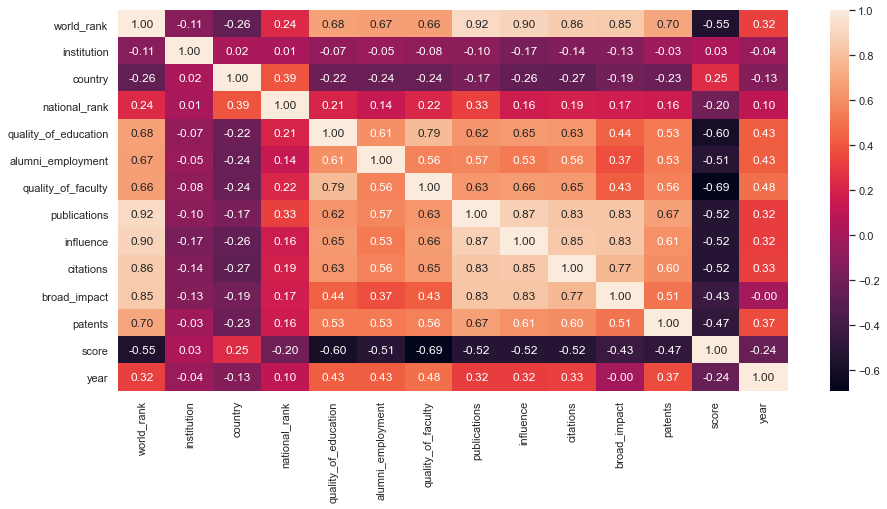

In [14]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

## 1. Тестовая и обучающая выборки

Подключим необходимый метод train_test_split из библиотек sklearn для разделения выборки на тестовую и обучающую

In [15]:
from sklearn.model_selection import train_test_split

### 1.1. Разделение выборки на входные и выходные данные

Задача регрессии будет состоять в предсказании платы за медицинское обслуживание на основании других параметров, в связи с этим следующее распределение входных и выходных параметров:

In [33]:
X = data.drop(['quality_of_faculty'], axis = 1)
Y = data.quality_of_faculty
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    world_rank  institution  country  national_rank  quality_of_education  \
0           1          184       54              1                     7   
1           2          312       54              2                     9   
2           3          511       54              3                    17   
3           4          637       57              1                    10   
4           5           53       54              4                     2   

   alumni_employment  publications  influence  citations  broad_impact  \
0                  9             1          1          1      496.6995   
1                 17            12          4          4      496.6995   
2                 11             4          2          2      496.6995   
3                 24            16         16         11      496.6995   
4                 29            37         22         22      496.6995   

   patents   score  year  
0        5  100.00  2012  
1        1   91.67  2012  

### 1.2. Разделим выборку на обучающую и тестовую

Размер тестовой выборки определим: 10%

In [34]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       world_rank  institution  country  national_rank  quality_of_education  \
98            99          966       33              2                   100   
30            31          571       57              4                    35   
712          513          113       47             19                   355   
1747         548         1016       17             23                   367   
703          504          328       54            161                   141   

      alumni_employment  publications  influence  citations  broad_impact  \
98                  101            65        101         60      496.6995   
30                  101            27         23         33      496.6995   
712                 395           954        915        800      979.0000   
1747                111           995        827        812      958.0000   
703                 157           580        617        609      739.0000   

      patents  score  y

Проверим:

In [35]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1980, 13)
(220, 13)
(1980,)
(220,)


## 1. Случайный лес

### 1.1. Построение случайного леса

Построим случайный лес из 5 деревьев

Подключим необходимый класс RandomForestRegressor из библиотек sklearn для построения случайного леса

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [38]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 3.94
Средняя квадратичная ошибка: 74.23672727272728
Median absolute error: 0.0
Коэффициент детерминации: 0.9807398104550062


**Построим график по полученным значениям**

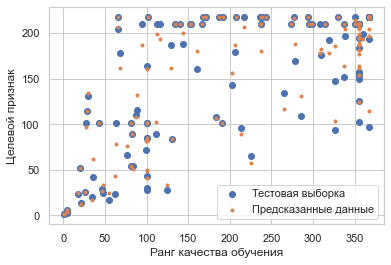

In [40]:
plt.scatter(X_test.quality_of_education, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.quality_of_education, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Ранг качества обучения')
plt.ylabel('Целевой признак')
plt.show()

### 1.2. Нахождение лучшего случайного леса

In [41]:
params2 = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0]
}

In [42]:
grid_2 = GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=10),
                      param_grid=params2, 
                      scoring='neg_mean_squared_error', 
                      cv=3, 
                      n_jobs=-1)
grid_2.fit(X, Y)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(oob_score=True, random_state=10),
             n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25, 50, 75, 100]},
             scoring='neg_mean_squared_error')

In [43]:
print('Лучший показатель средней квадратичной ошибки:', -grid_2.best_score_)
print('Параметры для данного показателя:\n',            grid_2.best_params_)

Лучший показатель средней квадратичной ошибки: 585.0427013502546
Параметры для данного показателя:
 {'max_features': 0.6, 'n_estimators': 50}


In [44]:
forest_3 = RandomForestRegressor(n_estimators=100, max_features = 0.6, oob_score=True, random_state=10)
forest_3.fit(X, Y)

RandomForestRegressor(max_features=0.6, oob_score=True, random_state=10)

In [45]:
Y_predict3 = forest_3.predict(X_test)

In [46]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict3))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict3))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict3))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict3))

Средняя абсолютная ошибка: 4.5725454545454545
Средняя квадратичная ошибка: 71.10039272727272
Median absolute error: 1.2299999999999898
Коэффициент детерминации: 0.9815535100891516


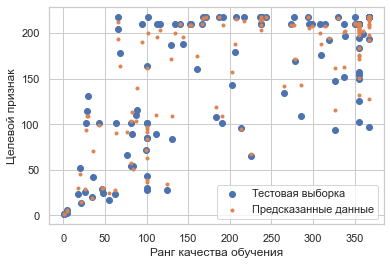

In [47]:
plt.scatter (X_test.quality_of_education, Y_test,     marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.quality_of_education, Y_predict3, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Ранг качества обучения')
plt.ylabel ('Целевой признак')
plt.show ()

    Показатели точности стали лучше
    На графике видно хорошее совпадение тестовой выборки и предсказанных данных.
   

## 2. Градиентный бустинг

Построим ансамбль из 5 моделей

Подключим необходимый класс GradientBoostingRegressor из библиотек sklearn для построения ансамбля

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
grad = GradientBoostingRegressor(n_estimators=5, random_state = 10)
grad.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=5, random_state=10)

In [50]:
Y_grad_pred = grad.predict(X_test)

In [51]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred))

Средняя абсолютная ошибка: 34.71133453141307
Средняя квадратичная ошибка: 1928.142766631475
Median absolute error: 25.420315407116476
Коэффициент детерминации: 0.49975710784365535


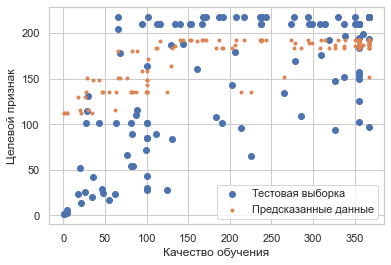

In [52]:
plt.scatter (X_test.quality_of_education, Y_test,      marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.quality_of_education, Y_grad_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Качество обучения')
plt.ylabel ('Целевой признак')
plt.show ()

Без подбора гиперпараметров ансамбль работает очень плохо

Для улучшения применим кросс-валидацию.

In [53]:
params = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
    'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1]
}

In [54]:
grid_gr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=10),
                       param_grid=params,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       n_jobs=-1)
grid_gr.fit(X, Y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=10),
             n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
                         'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                          25, 50, 75, 100]},
             scoring='neg_mean_squared_error')

In [55]:
print('Лучший показатель средней квадратичной ошибки:', -grid_gr.best_score_)
print('Параметры для данного показателя:\n',            grid_gr.best_params_)

Лучший показатель средней квадратичной ошибки: 649.9465207443166
Параметры для данного показателя:
 {'max_features': 0.9, 'min_samples_leaf': 0.01, 'n_estimators': 100}


In [56]:
grad1 = GradientBoostingRegressor(n_estimators=50, max_features = 1.0, min_samples_leaf = 0.04, random_state = 10)
grad1.fit(X_train, Y_train)
Y_grad_pred1 = grad1.predict(X_test)

Оценим полученный ансамбль

In [57]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred1))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred1))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred1))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred1))

Средняя абсолютная ошибка: 15.355525241046495
Средняя квадратичная ошибка: 771.6469754770492
Median absolute error: 3.8025336522673
Коэффициент детерминации: 0.7998016944509208


Построим график для визуального сравнения

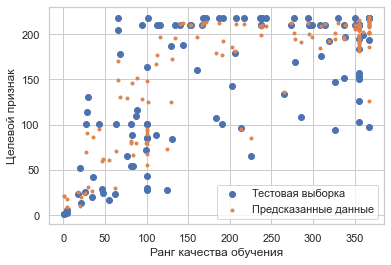

In [58]:
plt.scatter (X_test.quality_of_education, Y_test,       marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.quality_of_education, Y_grad_pred1, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Ранг качества обучения')
plt.ylabel ('Целевой признак')
plt.show()

In [ ]:
# The end.